![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here

pur = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding='latin1')

In [136]:
# Print out First 5 rows from dataframe
# Your code here

pur.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
# Print out brief info
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [0]:
# Your code here
pur.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [0]:
# List all NaN values

#All values with 'CustomerId' = 'NaN'
nanValuesOfCustomerID = pur[pur['CustomerID'].isna()]

#All values with 'Description' = 'NaN'
nanValuesOfDescription = pur[pur['Description'].isna()]


**Exclude negative Quatity entries**

In [0]:
negativeQuantity = pur[pur['Quantity']<0]

**Exclude negative Price entries**

In [0]:
 pur[pur['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [0]:
# Your code here

print('The customer with the highest number of orders comes from the United Kingdom (UK) has Id:',
      pur[pur['Country']=='United Kingdom'].mode().iloc[0].CustomerID) 

The customer with the highest number of orders comes from the United Kingdom (UK) has Id: 17841.0


**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
#Filter purchases comes from Netherlands
invoicesFormNetherlands = pur[pur['Country']=='Netherlands']

#Sum Quantity and UnitPrice for each customer from Netherlands
groupByCustomerID = invoicesFormNetherlands.groupby(['CustomerID']).sum()

#Sort in decreasing order and get first row 
sortByUnitPrice = groupByCustomerID.sort_values('UnitPrice', ascending=False).head(1)

#The first row represents the customer spent the most on purchases comes from Netherlands
sortByUnitPrice

,Quantity,UnitPrice
CustomerID,,
14646.0,196719,5400.21


**On which year had the highest sales?**

In [0]:
# Create Year column
pur['Year'] = pd.to_datetime(pur['InvoiceDate']).dt.strftime('%Y')

In [10]:
# Show first 5 rows in new data
pur.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010


In [0]:
# Get list of unique year
yearList = np.unique(pur["Year"])

In [32]:
#Find lastestSale and yearHaslargestSale
largestSale = 0
yearHaslargestSale = 0

for year in yearList:
  sumPrice = pur[pur['Year']==year].UnitPrice.sum()
  print("Sale in", year, "is: ", sumPrice)
  if (sumPrice>largestSale):
      largestSale = sumPrice
      yearHaslargestSale = year
  

print("Year has the highest sales: ", yearHaslargestSale)
print("Amount of sales in that year:", largestSale)

Sale in 2010 is:  260520.85000000003
Sale in 2011 is:  2238283.124
Year has the highest sales:  2011
Amount of sales in that year: 2238283.124


**How many orders (per hour)?**

In [0]:
pur['Hour'] = pd.to_datetime(pur['InvoiceDate']).dt.strftime('%H')

In [63]:
pur.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,12,08
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,12,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12,08


In [0]:
ordersPerHour = pur.Hour.value_counts()

In [65]:
# Show orders per hour
ordersPerHour

12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
09    34332
17    28509
08     8909
18     7974
19     3705
20      871
07      383
06       41
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

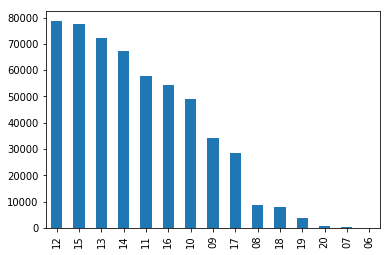

In [67]:
ordersPerHour.plot(kind='bar')

**How many orders (per month)?**

In [0]:
#Create a new column name: Month
pur['Month'] = pd.to_datetime(pur['InvoiceDate']).dt.strftime('%m')

In [58]:
pur.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,12


In [0]:
ordersPerMonth = pur.Month.value_counts()

In [61]:
ordersPerMonth

11    84711
12    68006
10    60742
09    50226
07    39518
05    37030
06    36874
03    36748
08    35284
01    35147
04    29916
02    27707
Name: Month, dtype: int64

**Make a plot about number of orders per month**

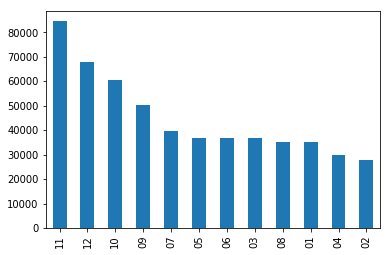

In [66]:
pur.Month.value_counts().plot(kind='bar')
# df.Country.value_counts().plot(kind='bar')

**Top 10 items most sales**

In [53]:
pur.Description.value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [0]:
# Your code here
dataWithoutUK = pur[pur['Country'] != 'United Kingdom']

In [0]:
# Number of quantity in each country in descreasing order
sumByQuantity = dataWithoutUK.groupby('Country').sum().sort_values('Quantity', ascending=False)

In [51]:
#Get 10 country has the most 'Quantity'
sumByQuantity.head(10)

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


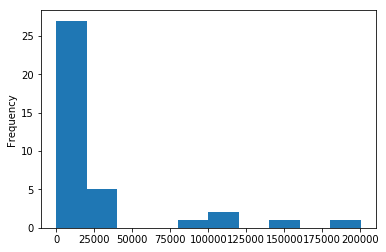

In [71]:
sumByQuantity['Quantity'].plot(kind='hist')

In [0]:
# What can you tell about this?

# 1. Unitprice does not depend on number of quantity in each country
# 2. United Kingdom has the largest number of quanity. 
# 3. The hour has the largest sale is 12. AM
# 4. The month has the largest sale is November(11)
# 5. Products have the most sales is 'WHITE HANGING HEART T-LIGHT HOLDER' and 'REGENCY CAKESTAND 3 TIER'



### You are awesome!!